In [1]:
from mendeleev import element
import pandas as pd
import numpy as np
import pymatgen as mg
import seaborn as sns
from pymatgen.ext.matproj import MPRester
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df_filtered_finished_data = pd.read_csv("AAX_Monolayer.csv") 
df_filtered_finished_data.head()

,Unnamed: 0,Formula,name,data,LOOP+,NIONS,NKDIM,NBANDS,energy,stress,...,Transition_Element,Halides,total_electron_count,total_nvalence,total_heat_of_formation,total_unpaired_electrons,total_electron_affinity,total_en_ghosh,total_en_pauling,total_dipole_polarizability
0,0,Cr2Cu2Br12,initial,"{'LOOP+': [3058.7523, 2817.9553, 221.8018, 343...","[3058.7523, 2817.9553, 221.8018, 343.4601, 234...",16.0,52.0,96.0,"[-53.40588273, -53.42443927, -53.4239795, -53....","[[['XX', 'YY', 'ZZ', 'XY', 'YZ', 'ZX'], [[-1.2...",...,"['Cr', 'Cu']",Br,526.0,118.0,2811.960,26.0,44.165058,3.460047,42.64,511.00
1,1,Cr4F12,initial,"{'LOOP+': [1109.3833, 1047.4229, 708.1875, 779...","[1109.3833, 1047.4229, 708.1875, 779.2437, 576...",16.0,52.0,96.0,"[-90.93678813, -92.99728693, -94.49712564, -95...","[[['XX', 'YY', 'ZZ', 'XY', 'YZ', 'ZX'], [[-101...",...,['Cr'],F,204.0,108.0,2541.940,36.0,43.478276,4.658537,54.40,376.88
2,2,Cr2Cu2Br12,spin,"{'LOOP+': [4872.843, 4811.0953, 1125.4931, 528...","[4872.843, 4811.0953, 1125.4931, 528.1156, 493...",16.0,52.0,96.0,"[-53.41881026, -53.42476446, -53.42481926, -53...","[[['XX', 'YY', 'ZZ', 'XY', 'YZ', 'ZX'], [[9.30...",...,"['Cr', 'Cu']",Br,526.0,118.0,2811.960,26.0,44.165058,3.460047,42.64,511.00
3,3,Cr2Pd2I12,afm_so,"{'LOOP+': [3822.7015, 1559.485], 'NIONS': 16, ...","[3822.7015, 1559.485]",16.0,100.0,160.0,"[-53.95428599, -53.95430363]","[[['XX', 'YY', 'ZZ', 'XY', 'YZ', 'ZX'], [[-0.1...",...,"['Cr', 'Pd']",I,776.0,120.0,2829.244,24.0,39.164442,3.184877,39.64,613.08
4,4,Zn2Cr2Cl12,spin_so_ip,"{'LOOP+': 2016.6999, 'NIONS': 16, 'NKDIM': 64,...",2016.6999,16.0,64.0,192.0,-58.16728598,"[['XX', 'YY', 'ZZ', 'XY', 'YZ', 'ZX'], [[-0.42...",...,"['Cr', 'Zn']",Cl,312.0,120.0,2511.384,24.0,44.684700,3.738550,44.54,418.54


In [3]:
from statistics import mean, median

formation_energy = df_filtered_finished_data['formation_energy']
#formation_energy_np = formation_energy.to_numpy(),linspace()

print(df_filtered_finished_data['formation_energy'].describe())


count    1420.000000
mean      -10.983779
std         8.448612
min       -79.949859
25%       -14.017442
50%        -8.996973
75%        -5.348502
max         3.218227
Name: formation_energy, dtype: float64


Text(0, 0.5, 'Frequency')

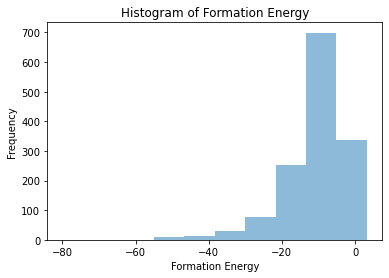

In [4]:
plt.hist(df_filtered_finished_data['formation_energy'],alpha=0.5)
plt.title('Histogram of Formation Energy')
plt.xlabel('Formation Energy')
plt.ylabel('Frequency')

In [5]:
# check for transition elements and halides in the formula

transition_elements_dict = {'Ti': 'titanium', 'V': 'vanadium','Cr': 'chromium','Mn': 'manganese','Fe': 'iron',
           'Co': 'cobalt','Ni': 'nickel','Cu': 'copper','Zr': 'zirconium','Nb': 'niobium',
           'Mo': 'molybdenum','Tc': 'technetium','Ru': 'ruthenium','Rh': 'rhodium','Pd': 'palladium',
           'Ag': 'silver','Hf': 'hafnium','Ta': 'tantalum','W': 'tungsten','Re': 'rhenium',
           'Os': 'osmium','Ir': 'iridium','Pt': 'platinum','Au': 'gold', 'Sc': 'scandium',
           'Zn': 'zinc','Y': 'yttrium','Cd': 'cadmium','Hg': 'mercury','Rf': 'rutherfordium',
           'Db': 'dubnium','Sg': 'seaborgium','Bh': 'bohrium','Hs': 'hassium','Mt': 'meitnerium',
           'Uun':'ununnilium','Uuu': 'unununium','Uub': 'unubium'}
transition_metal_symbol = list(transition_elements_dict.keys())
count = 0
for symbol in transition_metal_symbol:
    count = count +1

def classify_based_on_transition_metal( formula ):
   
   list_of_transition_metal = []
   for symbol in transition_metal_symbol:
    if(symbol in formula):
        list_of_transition_metal.append(symbol)
   return list_of_transition_metal



def has_key_in(string):
  return any(k in string for k in transition_elements_dict)

halides_dict = {'F': 'Fluoride', 'Cl': 'Chloride','Br': 'Bromide','I': 'Iodide'}
halide_symbol = list(halides_dict.keys())


def classify_based_on_halides( formula ):
   
   halides = ''
   for symbol in halide_symbol:
    if(symbol in formula):
        halides = symbol
   return halides


Count of transition element in dictionary ( x axis)
38
Presence of Transition Element in the data set :
{'Ti': 249, 'V': 44, 'Cr': 473, 'Mn': 43, 'Fe': 98, 'Co': 171, 'Ni': 92, 'Cu': 46, 'Zr': 70, 'Nb': 47, 'Mo': 57, 'Tc': 45, 'Ru': 484, 'Rh': 50, 'Pd': 64, 'Ag': 53, 'Hf': 0, 'Ta': 0, 'W': 30, 'Re': 0, 'Os': 0, 'Ir': 212, 'Pt': 46, 'Au': 72, 'Sc': 51, 'Zn': 110, 'Y': 14, 'Cd': 67, 'Hg': 0, 'Rf': 0, 'Db': 0, 'Sg': 0, 'Bh': 0, 'Hs': 0, 'Mt': 0, 'Uun': 0, 'Uuu': 0, 'Uub': 0}


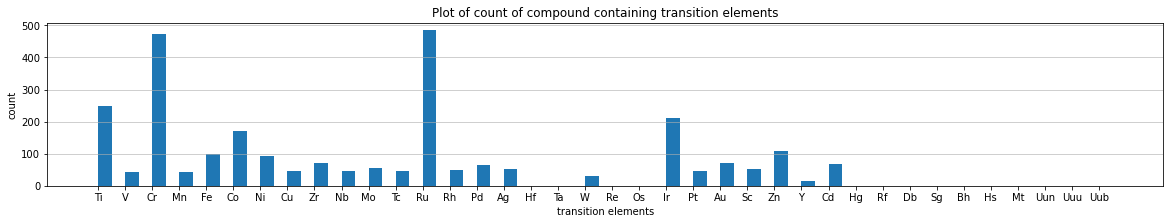

In [6]:
count = 0
d = { }

for ele in transition_metal_symbol:
    count = count +1
print("Count of transition element in dictionary ( x axis)")    
print(count)
#df_filtered_finished_data.Transition_Element

list_of_list_of_transition_metal = np.array(df_filtered_finished_data.Transition_Element)


#print(list_of_normalized_moment)
#print(list_of_list_of_transition_metal)
#transition_metal_symbol = ['Fe']

for ele in transition_metal_symbol:
    count = 0
    for each_list in df_filtered_finished_data.Transition_Element:
        if ele in each_list:
            count = count +1 
            #print(df_heatmap.normalized_moment)
    d[ele] = count
print("Presence of Transition Element in the data set :")
print(d)

plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)

plt.bar(range(len(d)), list(d.values()), align='edge', width=0.5)
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Plot of count of compound containing transition elements')
plt.xlabel('transition elements')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.show()

Count of Halides in dictionary ( x axis)
4
Presence of Halides in the data set :
{'F': 110, 'Cl': 394, 'Br': 449, 'I': 469}


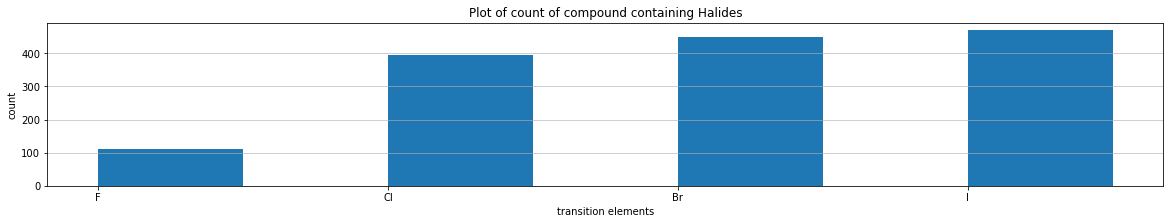

In [7]:
count = 0
d = { }

for ele in halide_symbol:
    count = count +1
print("Count of Halides in dictionary ( x axis)")    
print(count)
#df_filtered_finished_data.Transition_Element

list_of_list_of_halides = np.array(df_filtered_finished_data.Halides)

for ele in halide_symbol:
    count = 0
    for each_list in df_filtered_finished_data.Halides:
        if ele in each_list:
            count = count +1 
            #print(df_heatmap.normalized_moment)
    d[ele] = count
print("Presence of Halides in the data set :")
print(d)

plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)

plt.bar(range(len(d)), list(d.values()), align='edge', width=0.5)
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Plot of count of compound containing Halides')
plt.xlabel('transition elements')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.show()

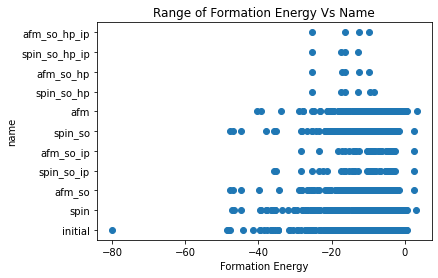

In [8]:
#plots to show the range of formation energy for different names

fig, ax = plt.subplots()

ax.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['name'])
plt.title('Range of Formation Energy Vs Name')
plt.xlabel('Formation Energy')
plt.ylabel('name')

plt.show()

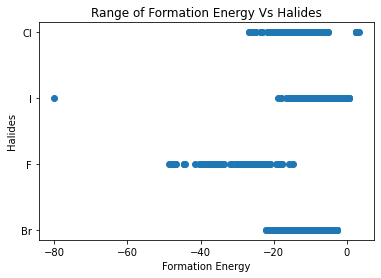

In [9]:

#plots to show the range of formation energy for different hallides
fig, ax2 = plt.subplots()

ax2.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['Halides'])

plt.title('Range of Formation Energy Vs Halides')
plt.xlabel('Formation Energy')
plt.ylabel('Halides')

plt.show()

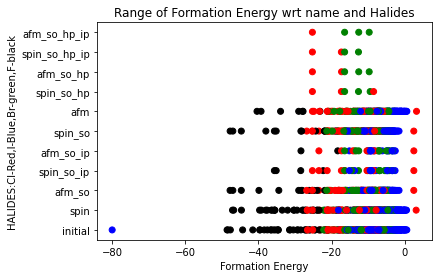

In [10]:
#plots to show the range of formation energy for different names
#the colors mark the three hallides available

fig, ax3 = plt.subplots()
colors = {"Cl":"red", "I":"blue", "Br":"green", "F":"black"}

ax3.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['name'], c=df_filtered_finished_data['Halides'].apply(lambda x: colors[x]))

plt.title('Range of Formation Energy wrt name and Halides')
plt.xlabel('Formation Energy')
plt.ylabel('HALIDES:Cl-Red,I-Blue,Br-green,F-black')

plt.show()

             name Halides  formation_energy_mean
0             afm      Br              -8.711890
1             afm      Cl             -12.600748
2             afm       F             -31.633181
3             afm       I              -4.367173
4          afm_so      Br              -9.467687
5          afm_so      Cl             -13.091877
6          afm_so       F             -31.326431
7          afm_so       I              -6.594292
8       afm_so_hp      Br             -12.908719
9       afm_so_hp      Cl             -21.255371
10   afm_so_hp_ip      Br             -12.908127
11   afm_so_hp_ip      Cl             -25.239002
12      afm_so_ip      Br              -8.784718
13      afm_so_ip      Cl             -11.388361
14      afm_so_ip       F             -23.335477
15      afm_so_ip       I              -7.020858
16        initial      Br              -9.641547
17        initial      Cl             -13.240290
18        initial       F             -30.654601
19        initial   

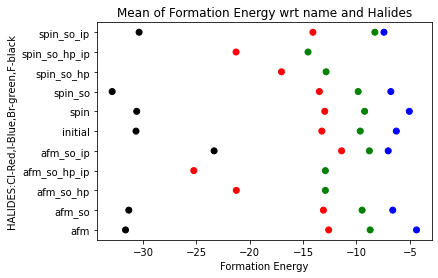

In [11]:
grouped_multiple = df_filtered_finished_data.groupby(['name', 'Halides']).agg({'formation_energy': ['mean']})
grouped_multiple.columns = ['formation_energy_mean']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

fig, ax4 = plt.subplots()
colors = {"Cl":"red", "I":"blue", "Br":"green", "F":"black"}

ax4.scatter(grouped_multiple['formation_energy_mean'], grouped_multiple['name'], c=grouped_multiple['Halides'].apply(lambda x: colors[x]))
plt.title('Mean of Formation Energy wrt name and Halides')
plt.xlabel('Formation Energy')
plt.ylabel('HALIDES:Cl-Red,I-Blue,Br-green,F-black')
plt.show()

In [12]:
grouped_multiple = df_filtered_finished_data.groupby(['name', 'Halides'])['formation_energy'].count()
#grouped_multiple.columns = ['formation_energy_mean']
grouped_multiple = grouped_multiple.reset_index()

print(grouped_multiple)
# Made a BiPartite graph for dynamic visualization

             name Halides  formation_energy
0             afm      Br                71
1             afm      Cl                71
2             afm       F                 7
3             afm       I                78
4          afm_so      Br                79
5          afm_so      Cl                67
6          afm_so       F                14
7          afm_so       I                81
8       afm_so_hp      Br                 3
9       afm_so_hp      Cl                 2
10   afm_so_hp_ip      Br                 3
11   afm_so_hp_ip      Cl                 1
12      afm_so_ip      Br                13
13      afm_so_ip      Cl                 7
14      afm_so_ip       F                 2
15      afm_so_ip       I                15
16        initial      Br                98
17        initial      Cl                82
18        initial       F                39
19        initial       I               112
20           spin      Br                85
21           spin      Cl       

In [13]:
# corelation between formation energy and descriptor
# more correlated if close to 1
print(df_filtered_finished_data.columns)
df_energy_heatmap = df_filtered_finished_data[['relaxed_Energy', 'sum_individual_energy', 'formation_energy',
                                              'total_electron_count', 'total_nvalence', 'total_heat_of_formation',
                                           'total_unpaired_electrons', 'total_electron_affinity', 'total_en_ghosh',
                                           'total_en_pauling', 'total_dipole_polarizability']].copy()

Index(['Unnamed: 0', 'Formula', 'name', 'data', 'LOOP+', 'NIONS', 'NKDIM',
       'NBANDS', 'energy', 'stress', 'retry_count', 'lattice_vecs',
       'total charge', 'magnetization', 'position_force', 'volume of cell',
       'relaxed_Energy', 'sum_individual_energy', 'elements_present',
       'composition', 'formation_energy', 'Transition_Element', 'Halides',
       'total_electron_count', 'total_nvalence', 'total_heat_of_formation',
       'total_unpaired_electrons', 'total_electron_affinity', 'total_en_ghosh',
       'total_en_pauling', 'total_dipole_polarizability'],
      dtype='object')


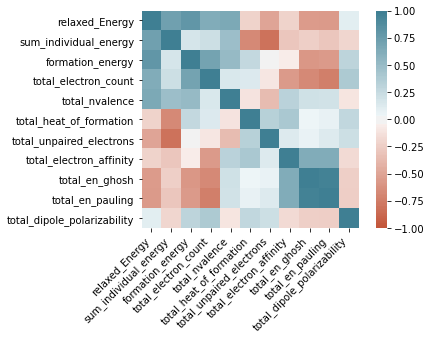

In [14]:
corr = df_energy_heatmap.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#http://bl.ocks.org/e9t/3f03e719dae6f3102f80011a3be83739